<a href="https://colab.research.google.com/github/junhyeok0703/Automatically_Algorithms/blob/main/4_2_%EC%A7%80%EB%8A%A5%ED%98%95_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# import torch
# import torch.nn as nn

# class Autoencoder(nn.Module):
#     def __init__(self): # 생성자 -> encoder와 decoder의 구조를 정의
#         super(Autoencoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(28 * 28, 128), # 인풋 아웃풋개수를
#             nn.ReLU(True),#  액티베이션 펑션
#             nn.Linear(128, 64),
#             nn.ReLU(True),
#             nn.Linear(64, 12),
#             nn.ReLU(True),
#             nn.Linear(16,4)
#         )
#         self.decoder = nn.Sequential(
#             nn.Linear(4,16), # 인풋 아웃풋개수
#             nn.ReLU(True),
#             nn.Linear(12, 64),
#             nn.ReLU(True),
#             nn.Linear(64, 128),
#             nn.ReLU(True),
#             nn.Linear(128, 28 * 28),
#             nn.Sigmoid(),
#         )

#     def forward(self, x): # Autoencoder 클래스의 instance에서 호출하는 함수
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

# # Example usage:
# # model = Autoencoder()
# # optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# # ... (training loop with data loading and loss calculation)


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [3]:

import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools


class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.layer1 = nn.Sequential(
      nn.Conv2d(1,16,3,padding=1), # 16 x 28 x 28
      nn.ReLU(),
      nn.BatchNorm2d(16),
      nn.Conv2d(16,32,3,padding=1), # 32 x 28 x 28
      nn.ReLU(),
      nn.BatchNorm2d(32),
      nn.Conv2d(32,64,3,padding=1), # 64 x 28 x 28
      nn.ReLU(),
      nn.BatchNorm2d(64),
      nn.MaxPool2d(2,2) # 64 x 14 x 14
  )
    self.layer2 = nn.Sequential(
        nn.Conv2d(64,128,3,padding=1), # 128 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Conv2d(128,256,3,padding=1), # 256 x 7 x 7
        nn.ReLU()
  )
  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(batch_size, -1)
    return out

class Decoder(nn.Module):
  def __init__(self):
    super(Decoder,self).__init__()
    self.layer1 = nn.Sequential(
        nn.ConvTranspose2d(256,128,3,2,1,1), # 128 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.ConvTranspose2d(128,64,3,1,1), # 64 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(64) )
    self.layer2 = nn.Sequential(
        nn.ConvTranspose2d(64,16,3,1,1), # 16 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.ConvTranspose2d(16,1,3,2,1,1), # 1 x 28 x 28
        nn.ReLU()
)
  def forward(self,x):
    out = x.view(batch_size,256,7,7)
    out = self.layer1(out)
    out = self.layer2(out)
    return out

In [4]:

import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools


class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.layer1 = nn.Sequential(
      nn.Conv2d(1,16,3,padding=1), # 16 x 28 x 28
      nn.ReLU(),
      nn.BatchNorm2d(16),
      nn.Conv2d(16,32,3,padding=1), # 32 x 28 x 28
      nn.ReLU(),
      nn.BatchNorm2d(32),
      nn.Conv2d(32,64,3,padding=1), # 64 x 28 x 28
      nn.ReLU(),
      nn.BatchNorm2d(64),
      nn.MaxPool2d(2,2) # 64 x 14 x 14
  )
    self.layer2 = nn.Sequential(
        nn.Conv2d(64,128,3,padding=1), # 128 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Conv2d(128,256,3,padding=1), # 256 x 7 x 7
        nn.ReLU()
  )
  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(batch_size, -1)
    return out

class Decoder(nn.Module):
  def __init__(self):
    super(Decoder,self).__init__()
    self.layer1 = nn.Sequential(
        nn.ConvTranspose2d(256,128,3,2,1,1), # 128 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.ConvTranspose2d(128,64,3,1,1), # 64 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(64) )
    self.layer2 = nn.Sequential(
        nn.ConvTranspose2d(64,16,3,1,1), # 16 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.ConvTranspose2d(16,1,3,2,1,1), # 1 x 28 x 28
        nn.ReLU()
)
  def forward(self,x):
    out = x.view(batch_size,256,7,7)
    out = self.layer1(out)
    out = self.layer2(out)
    return out

In [5]:
mnist_train = dset.MNIST("./data/MNIST", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 20522074.24it/s]


Extracting ./data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 636815.57it/s]


Extracting ./data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5629165.49it/s]


Extracting ./data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3207699.74it/s]

Extracting ./data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



In [6]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [7]:
num_epoch = 10
Learning_rate = 0.0002
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
decoder = Decoder().to(device)
parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=Learning_rate)

In [8]:
for i in range(1):
  for j,[image, label] in enumerate(test_loader):

    image = image.to(device)
    z = encoder(image)
    output = decoder(z)
    loss = loss_func(output,image)
  if j % 10 == 0:
      print(loss)
print("loss is", loss.cpu().item())

loss is 0.7920517921447754


torch.Size([100, 28, 28])


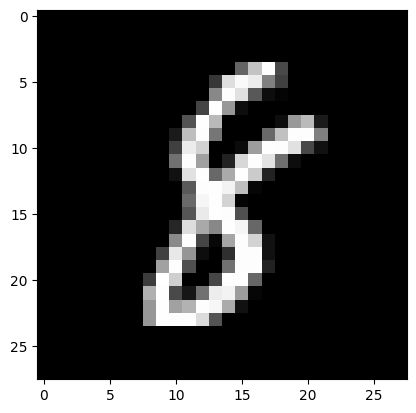

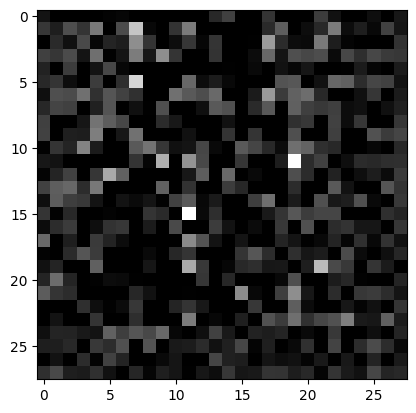

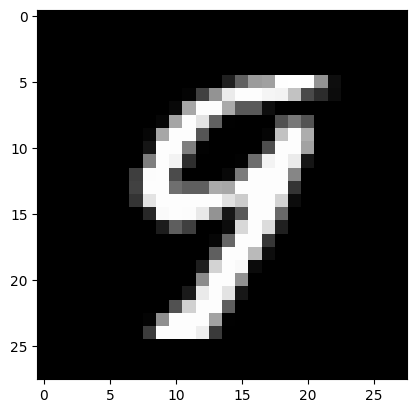

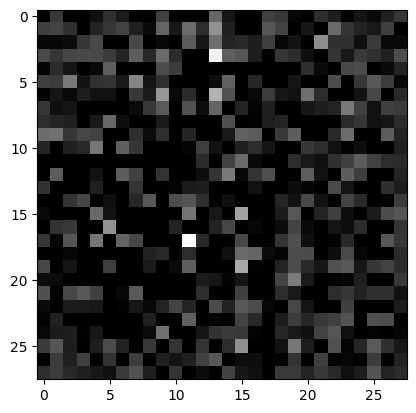

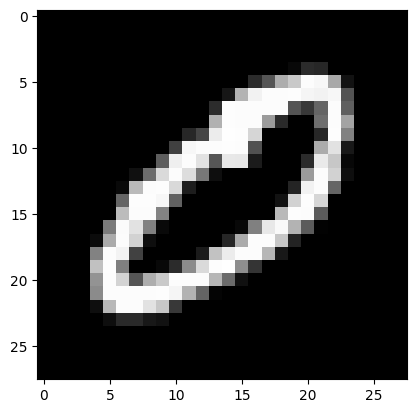

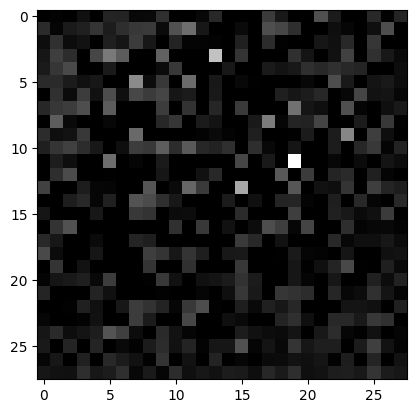

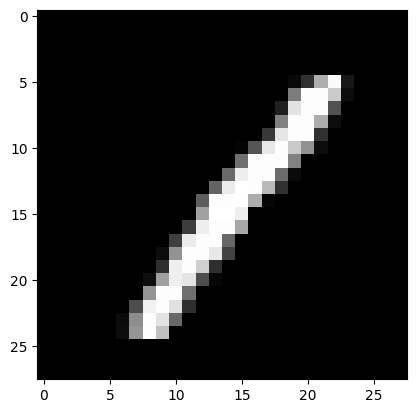

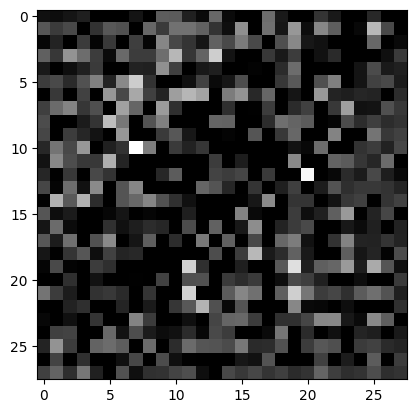

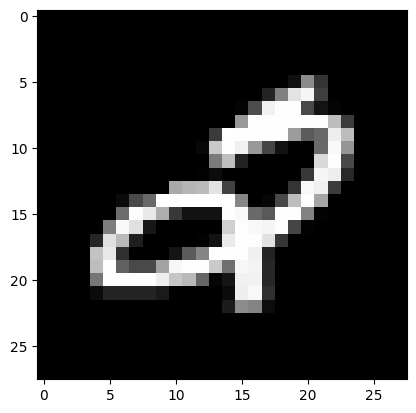

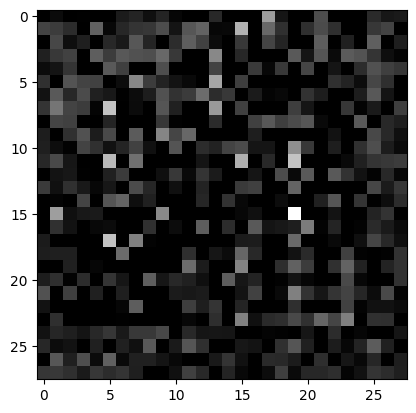

In [9]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
for i in range(5):
    plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [10]:
for i in range(num_epoch):
  for j,[image, label] in enumerate(train_loader):
        optimizer.zero_grad()
        image = image.to(device)
        z = encoder(image)
        output = decoder(z)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

  print("loss is", loss.cpu().item())

loss is 0.00480621075257659
loss is 0.0032398204784840345
loss is 0.0025378684513270855
loss is 0.002025349996984005
loss is 0.0016787974163889885
loss is 0.001501402584835887
loss is 0.0012101965257897973
loss is 0.0010430634720250964
loss is 0.0008877751533873379
loss is 0.0008999775163829327


torch.Size([100, 28, 28])


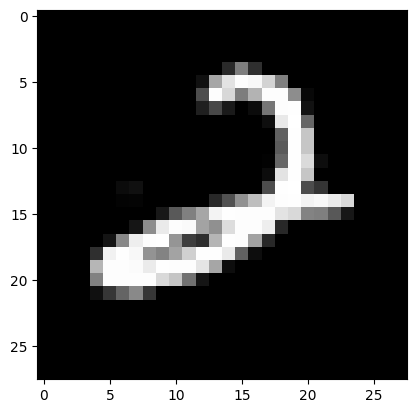

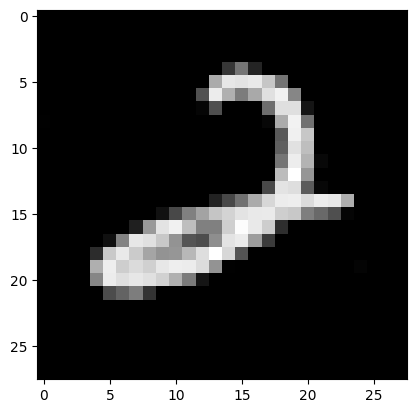

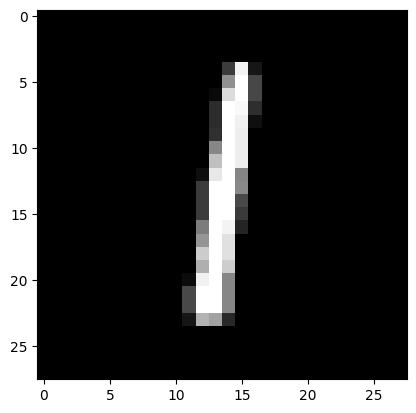

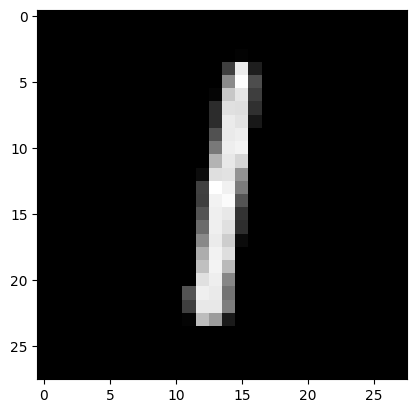

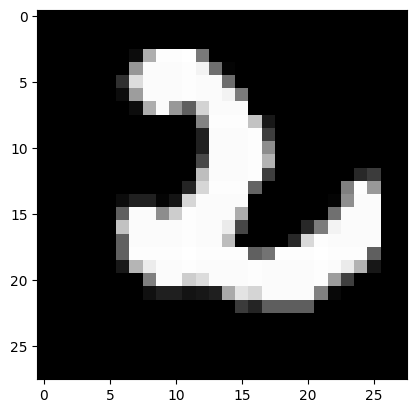

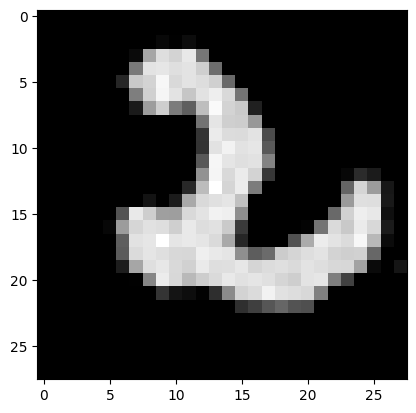

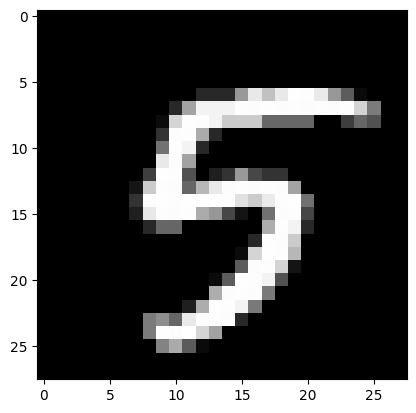

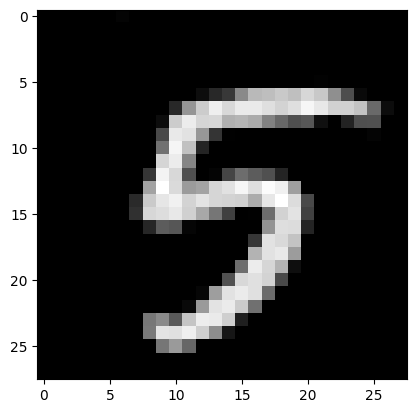

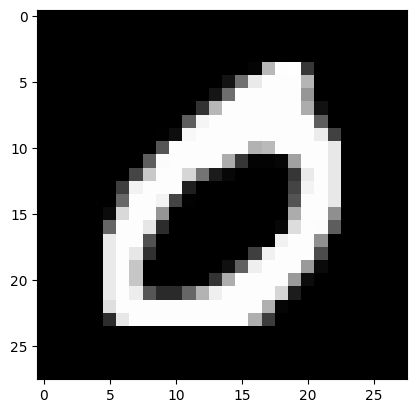

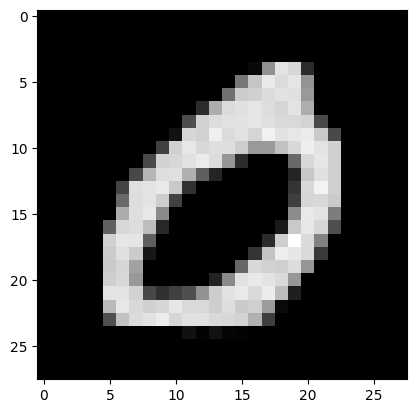

In [11]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
for i in range(5):
    plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()